# I. Introduction

<h6> Introduction to the Data </h6>

> I took a classification and regression dataset with a sizeable number of entries and attributes and analyzed and described the layout of the data.

> <h6> Classification Data </h6>

>>  I used one classification based data set that collected data from adults around the world and recorded attributes such as education, work class, marital status, occupation, relationship, race, native country, capital-gain and loss and the amount of hours they worked per week. All of these data attributes are used to **classify whether the individual makes more than or less than 50k per year.**

> <h6> Regression Data </h6>

>> For the regression based data set I analyzed a concrete weight dataset that uses the composite matter in the concrete to **estimate the compressive concrete strength.** This dataset was prescreened and did not have to be cleaned since all of the attributes contained within the dataset are the float datatype and did not have any discrepancies. 

# II. Review

<h3> Linear Algebra </h3>

> Linear Algebra revolves around the algebra and manipulation of scalars and vectors. This chapter focused on the use of linear algebra operations on data such as matrices to find certain outcomes. These operations include multiplication, additions, subtraction, transpose, and dot product. The resultant vector can then be used for deep learning purposes.


<h3> Probability Theory </h3>

> Probability Theory is concerned with the probability of picking a certain instance given a probability space. Essentially expressing everything as a percent chance of obtaining certain axioms within the random space. Furthermore, this chapter explains the importance of probability theory in deep learning as a means to classify objects correctly.

# III. Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Classification - Adult Data
https://archive.ics.uci.edu/ml/datasets/Adult

In [2]:
adult_df = pd.read_csv("adult.csv") 
adult_df = adult_df.rename(columns={' Not-in-family' : 'relationship',' Adm-clerical': 'occupation',' Never-married': 'marital-status',' Bachelors': 'education',' State-gov': 'workclass', ' United-States': 'native-country', ' White' : 'Race', ' Male': 'Sex', '39' : 'Age', ' 77516' : 'final weight', ' 13': 'education-numerical' , ' 2174': 'capital-gain', ' 0': 'capital-loss', ' 40' : 'hours-p-week'})
adult_df

,Age,workclass,final weight,education,education-numerical,marital-status,occupation,relationship,Race,Sex,capital-gain,capital-loss,hours-p-week,native-country,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [3]:
predictors = adult_df.iloc[:,0:-1].columns
target = adult_df.iloc[:,-1]
# adult_df.isna().sum()
print(predictors)
print(adult_df.shape)

Index(['Age', 'workclass', 'final weight', 'education', 'education-numerical',
       'marital-status', 'occupation', 'relationship', 'Race', 'Sex',
       'capital-gain', 'capital-loss', 'hours-p-week', 'native-country'],
      dtype='object')
(32560, 15)


In [4]:
adult_df.describe()

,Age,final weight,education-numerical,capital-gain,capital-loss,hours-p-week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


<h5> Cleaning the data </h5>

> The adult.names files explains the recorded attribute names. When imported the data columns get shifted and need to be corrected as they are not representative of the correct names (thus, the renaming of columns). Screening the data to see if there are any null entries, but there are not. We see that there are 14 attributes we can use for the classification of the target. The target we are trying to classify is **whether the individual makes less than or equal to 50k annually or not**. 

<h5> Understanding the Data </h5>

> We see with the `adult_df.describe()` above, that the average age is 38 which is definetly targetting mid-aged adults. Furthermore, we see that the average education level that these adults reach to is 10th grade - which is the equivalent to recieving a high school degree before working. We see that the capital-gain and capital-loss are fairly standard (makes sense) for the given adult population. Lastly, the average working time per hour for these adults are more than 40 hours. Meaning a lot of these adults work full time.

In [5]:
graph_df = adult_df.copy()
sex_conversion = {' Male': 0, ' Female' : 1}
race_conversion = {' White' : 0 , ' Black' : 1, ' Asian-Pac-Islander': 2, ' Amer-Indian-Eskimo': 3, ' Other' : 4}
relationship_conversion = {' Own-child': 5 , ' Husband' : 0 , ' Wife': 1, ' Not-in-family' : 2, ' Unmarried': 3, ' Other-relative' : 4}
# # graph_df
graph_df = graph_df.replace({"Sex": sex_conversion, "Race": race_conversion, "relationship": relationship_conversion})

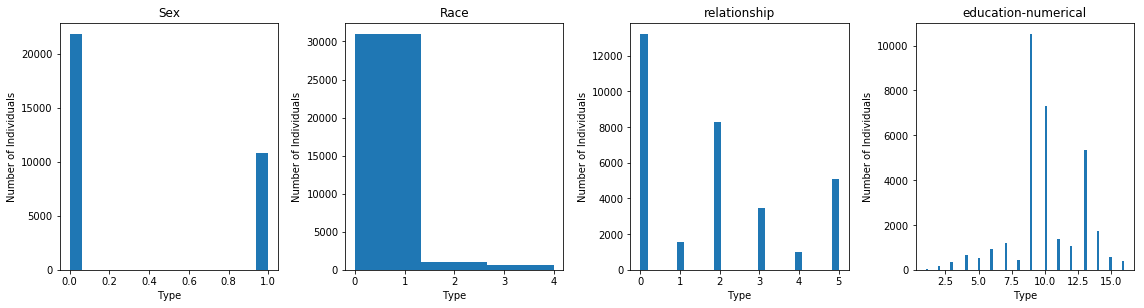

In [6]:
histogram_df = graph_df[['Sex', 'Race','relationship', 'education-numerical']]
fig = plt.figure(figsize=(16,16))
plt.clf() 

# 3 - 3 - 5 - 16 binwidths are for the num of unique values in the columns
for i, binwidth in enumerate([3, 3, 5, 16]):
    ax = plt.subplot(4, 4, i+1)
    if i != 1:
        ax.hist(histogram_df.iloc[:,i], bins = 'auto')
    else:
        ax.hist(histogram_df.iloc[:,i], bins = binwidth)
    ax.set_title(histogram_df.columns[i])
    ax.set_xlabel('Type')
    ax.set_ylabel('Number of Individuals')

plt.tight_layout()
plt.show()

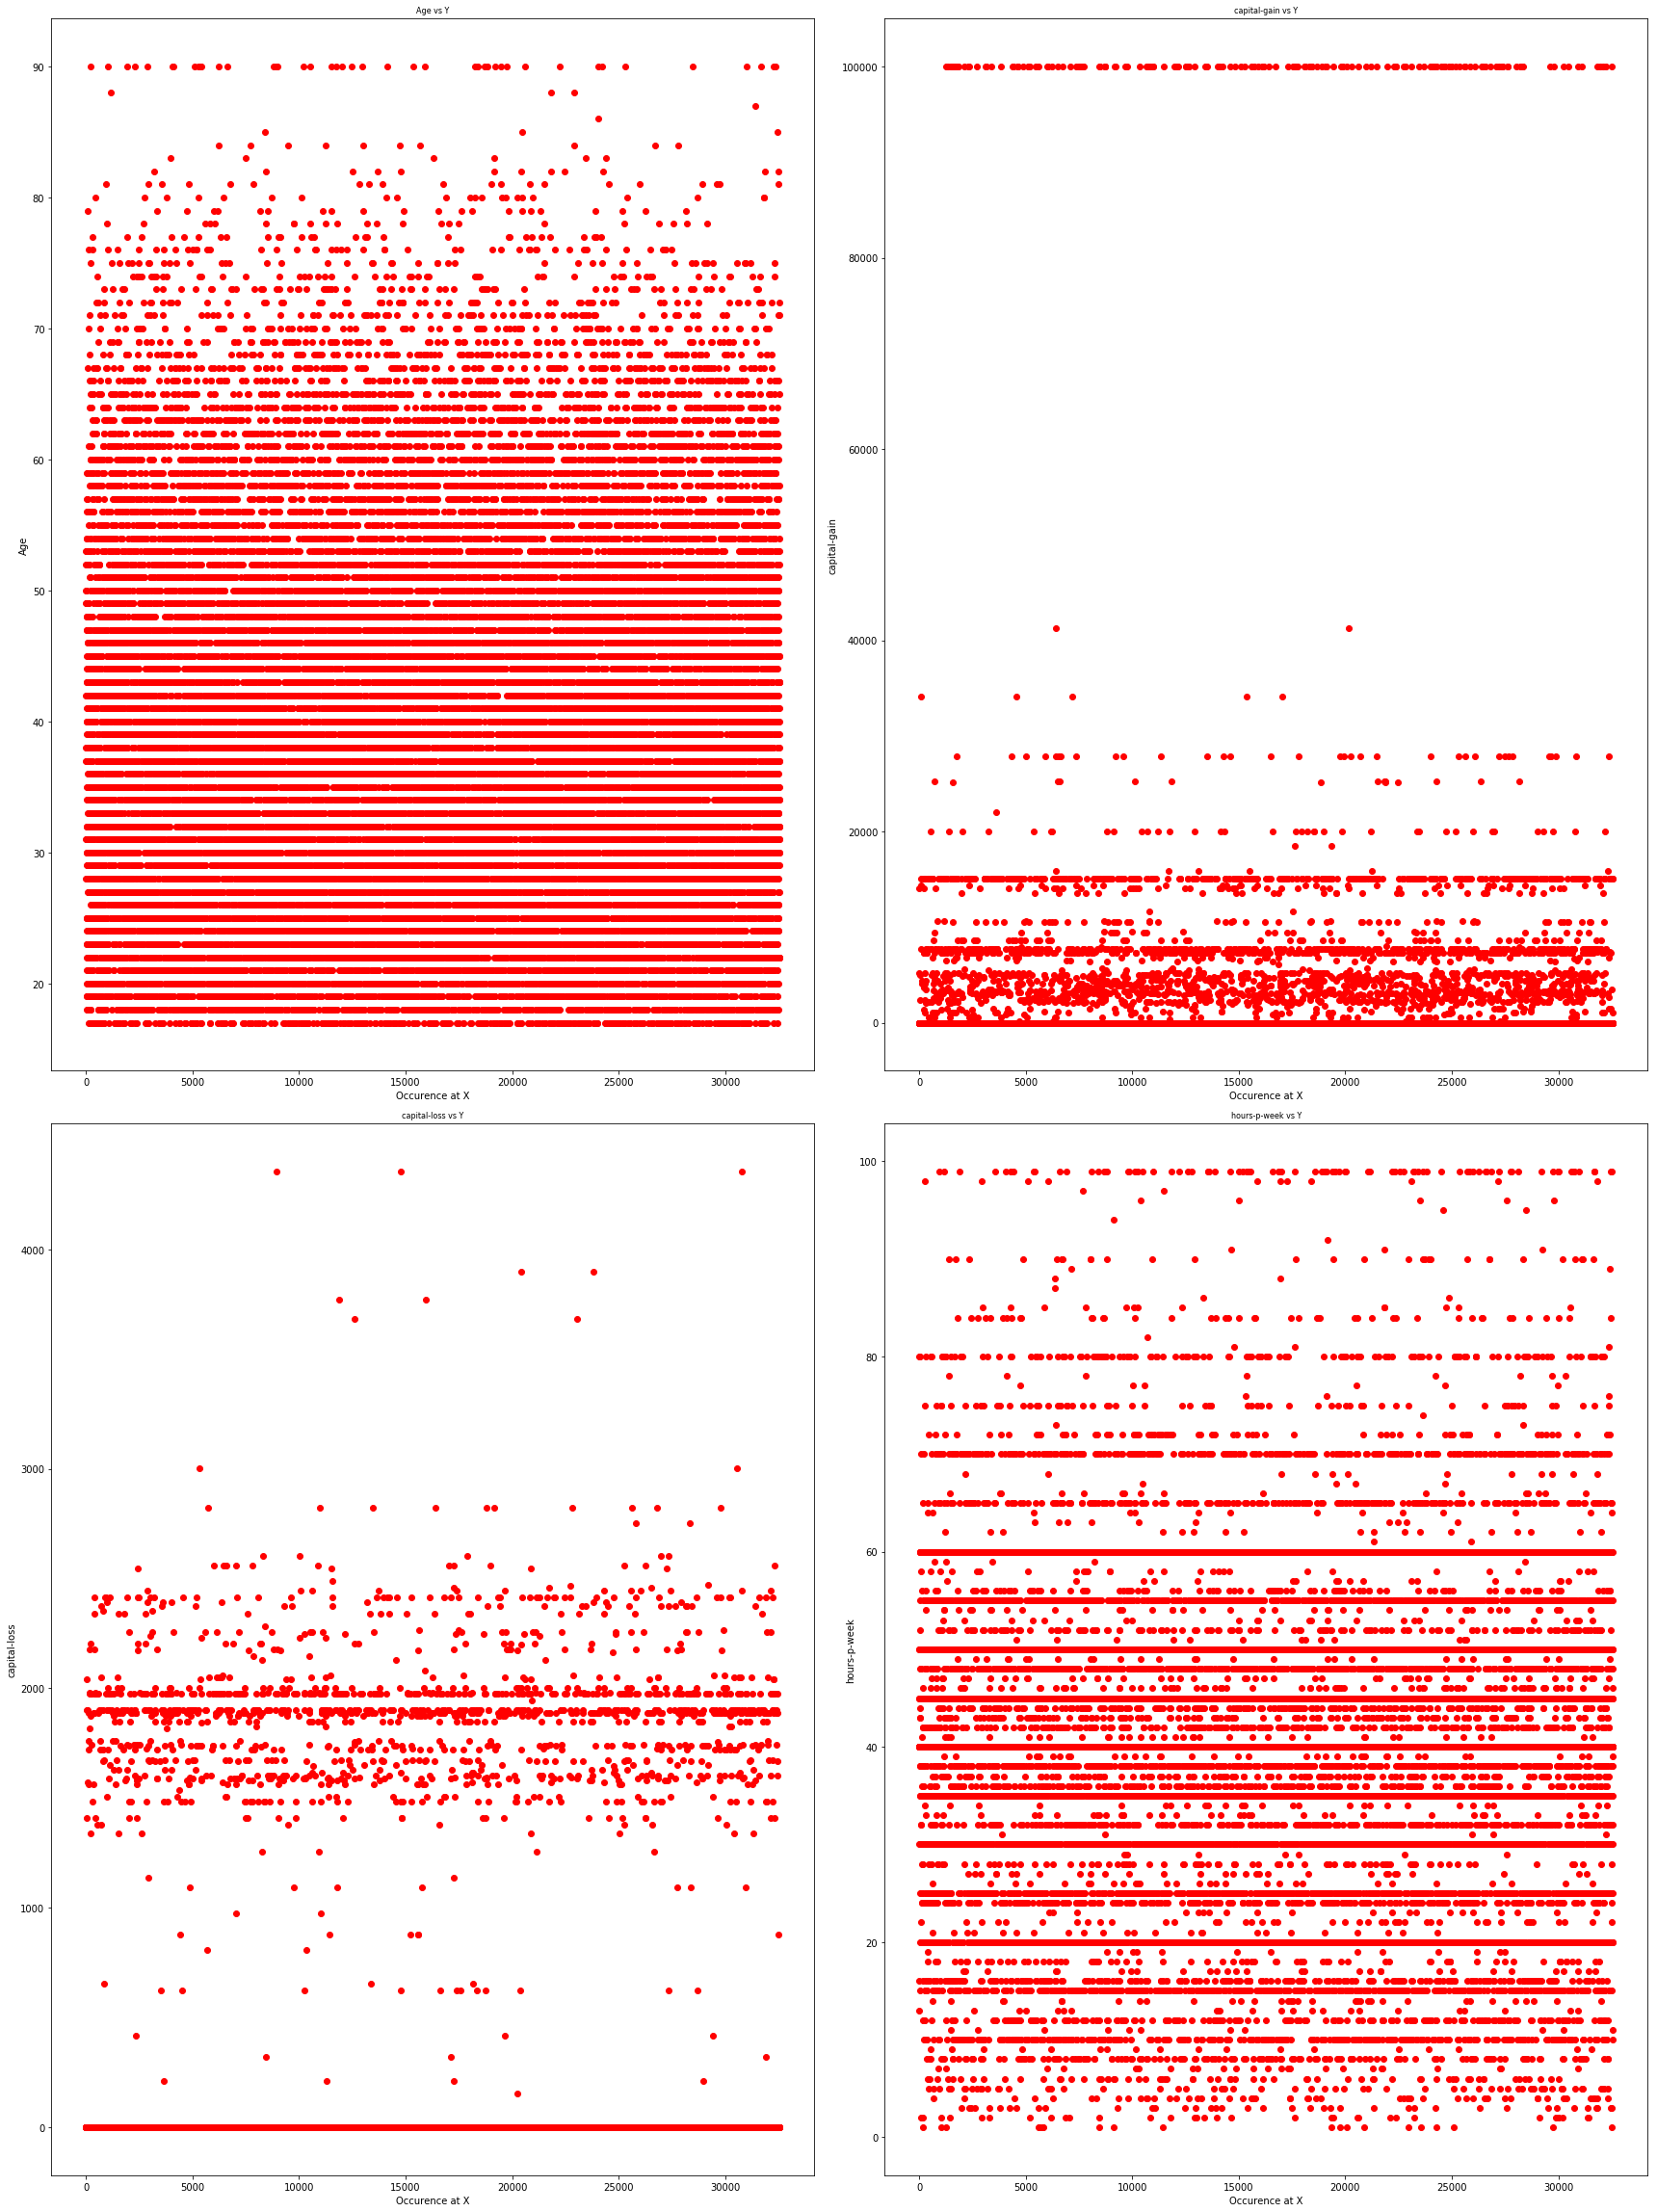

In [7]:
plot_df = graph_df[['Age', 'capital-gain', 'capital-loss', 'hours-p-week']]

fig = plt.figure(figsize=(24,32))
plt.clf() 
for i in range(4):
    plt.subplot(2, 2, i+1) 
    plt.title(plot_df.columns.values[i] + " vs Y" , fontdict={'fontsize': 8, 'fontweight': 'medium'})
    plt.plot(plot_df.iloc[:,i], 'ro')
    plt.ylabel(plot_df.columns.values[i]) 
    plt.xlabel("Occurence at X")
    
fig.tight_layout()

<h5> Understanding the graphs </h5>

> <h6> Histograms </h6>

>> The graphs above are suited based on the classification based dataset we have above. The histogram is an accurate way of seeing the density distribution occuring between different races, sexes, relationship statuses, and the average educational status reached. This had to be done after converting each of the values with the df converter above. Thus, for instance, we can see that there are a lot more men who are in this dataset - rougly double that of women. This reflects clearly in the histogram for the relationship status as the vast majority of the dataset individuals are "husbands". Meanwhile, the races are heavily between white and black. Lastly, the majority of the highest education that people have reached are about 10th grade. There are quite a bit who reached 12th grade (graduation of high school). 

> <h6> Scatter Plots </h6>

>> The scatter plot is accurate in representing the amount of occurences on an (x,y) plane of the total distribution based on age, capital-gain, capital-loss, and the amount of hours worked per week. We can see that there is a fairly constant number of people who are aged between 20 - 70 and then above 70 there are fewer and fewer. For capital gain we see that majority of individuals are under 20,000 whereas there are a quite a few whom are at a solid 100,000. Though it is fairly scattered for capital-losses. Lastly, the hours worked per week are fairly evenly scattered throughout from 20 - 100 hours. There are not as many that work 0 - 10 hours.



## Regression - Concrete Strength Data
https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength

In [8]:
concrete_df = pd.read_excel("Concrete_Data.xls")
concrete_df

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.698299
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.447770
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.854291
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.289790


In [9]:
print(concrete_df.isnull().sum())
concrete_df.describe()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


<h6> Cleaning the data </h6>

> This data was already cleaned of all null values and any values that may not have been in the correct float format- effectively the data was preprocessed.

<h6> Understanding the data </h6>

> This data is a regression based dataset that uses the attributes of component mixtures, age, and overall makeup to determine the compressive strength in megapascals of the cement mixture. Therefore, certain amounts of water, cement, superplasticizer, coarse aggregate and aging could result in a different concrete compressive strength and that is the target attribute we are trying to predict. The `df.describe()` method shows us some insight on the data. We can see that there are 1030 entries for each element and that there are no null values. Furthermore, diving deeper we see that the average age for all of the entries is about 45 days. Meaning that majority of the concrete on average has been out for 45 days. The quartile for it is very vast though as the minimum age is 1 day and the maximum is 365 days. The rest of the means are significant but they aren't very informative since we aren't sure yet how much each component actually effects the data. We will see the effect of each component in the graphs below.

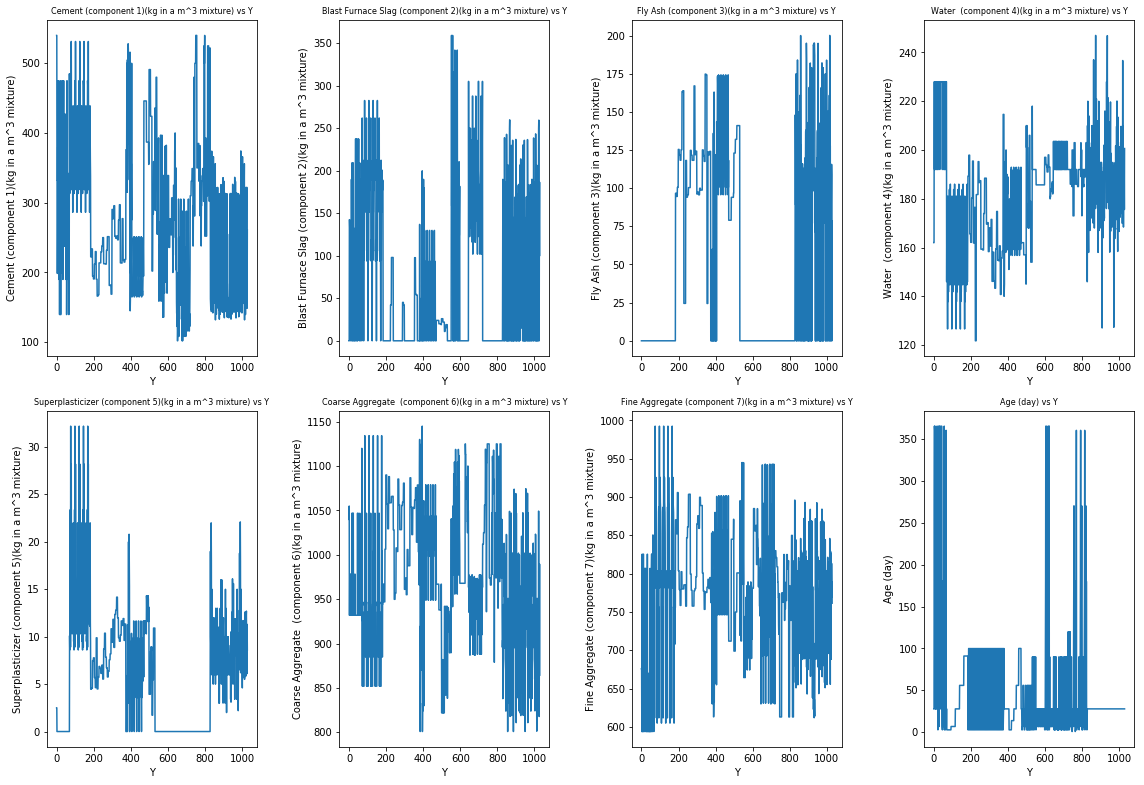

In [10]:
fig = plt.figure(figsize=(16,16))
plt.clf() 
for i in range(8):
    plt.subplot(3, 4, i+1) 
    plt.title(concrete_df.columns.values[i] + " vs Y" , fontdict={'fontsize': 8, 'fontweight': 'medium'})
    plt.plot(concrete_df.iloc[:,i]) 
    plt.ylabel(concrete_df.columns.values[i])
    plt.xlabel("Y")
fig.tight_layout()

<h6> Understanding the graphs </h6>

> This plot shows us the (X,Y) graphing of points as the column number increased. The actual plot between the X and Y is not useful, however, this plot gives us an understanding of the general distribution of the data. For instance, we see that some components, such as the fly ash (component 3) is highly sporadic. There are some that are very high containing about 200 kgs in a $m^3$ mixture, whereas some had a low of 0 kgs in a $m^3$ mixture. This is very similar to the Superplasticizers (component 5) and Age. The other attributes seemed to be distributed evenly across the data points.


# References

<h6> Classification Data </h6>

> https://archive.ics.uci.edu/ml/datasets/Adult

<h6> Regression Data </h6>

> https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength